## Imports

In [2]:
import os
import librosa
import numpy as np
import pandas as pd
import librosa.display
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore', module="pydub")

%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Loading and Preprocessing

In [4]:
MAIN_PATH = "E:/B21-CAP0443 Dataset/[Audio - Classification] COVID-19 Open Cough Dataset/virufy-data-main/clinical"
CSV_FILE_PATH = MAIN_PATH + "/labels.csv"
DATA_PATH = MAIN_PATH + "/original/"

In [5]:
data = pd.read_csv(CSV_FILE_PATH).drop(['date', 'age', 'gender', 'medical_history', 'patient_reported_symptoms', 'smoker'], axis=1)
data.head(10)

,corona_test,cough_filename
0,negative,neg-0421-083-cough-m-53.mp3
1,positive,pos-0421-084-cough-m-50.mp3
2,negative,neg-0421-085-cough-m-43.mp3
3,positive,pos-0421-086-cough-m-65.mp3
4,positive,pos-0421-087-cough-f-40.mp3
5,negative,neg-0421-088-cough-f-66.mp3
6,negative,neg-0421-089-cough-f-20.mp3
7,negative,neg-0421-090-cough-f-17.mp3
8,negative,neg-0421-091-cough-m-47.mp3
9,positive,pos-0421-092-cough-m-53.mp3


In [6]:
classes = data['corona_test'].unique()
class_dict = {i:x for x, i in enumerate(classes)}
class_dict

{'negative': 0, 'positive': 1}

In [7]:
data['corona_test'] = data['corona_test'].map(class_dict)
data

,corona_test,cough_filename
0,0,neg-0421-083-cough-m-53.mp3
1,1,pos-0421-084-cough-m-50.mp3
2,0,neg-0421-085-cough-m-43.mp3
3,1,pos-0421-086-cough-m-65.mp3
4,1,pos-0421-087-cough-f-40.mp3
5,0,neg-0421-088-cough-f-66.mp3
6,0,neg-0421-089-cough-f-20.mp3
7,0,neg-0421-090-cough-f-17.mp3
8,0,neg-0421-091-cough-m-47.mp3
9,1,pos-0421-092-cough-m-53.mp3


## Convert .mp3 format to .wav

In [8]:
import pydub
from pydub import AudioSegment

ENV_DIR = "D:/Notebook/Projects/Python/B21-CAP0443/"

for label in [0, 1]:
    for row in tqdm(data.iterrows(), leave=True, total=len(data)):
        if row[1][0] == 0:
            src = DATA_PATH + 'neg/' + row[1][1]
            dst = ENV_DIR + 'audio/covid/neg/' + ''.join(row[1][1].split('.mp3')) + '.wav'
            # dst = ENV_DIR + 'audio/covid/neg/'

            sound = AudioSegment.from_mp3(src)
            sound.export(dst, format="wav")
        elif row[1][0] == 1:
            src = DATA_PATH + 'pos/' + row[1][1]
            dst = ENV_DIR + 'audio/covid/pos/' + ''.join(row[1][1].split('.mp3'))  + '.wav'
            #dst = ENV_DIR + 'audio/covid/pos/'

            sound = AudioSegment.from_mp3(src)
            sound.export(dst, format="wav")

  0%|          | 0/16 [00:00<?, ?it/s]

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-083-cough-m-53.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-084-cough-m-50.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-085-cough-m-43.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-086-cough-m-65.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-087-cough-f-40.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-088-cough-f-66.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-089-cough-f-20.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-090-cough-f-17.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-091-cough-m-47.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-092-cough-m-53.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-093-cough-f-24.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-094-cough-m-51.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0422-095-cough-m-53.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0422-096-cough-m-31.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0422-097-cough-m-37.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0422-098-cough-f-24.wav'>

  0%|          | 0/16 [00:00<?, ?it/s]

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-083-cough-m-53.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-084-cough-m-50.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-085-cough-m-43.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-086-cough-m-65.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-087-cough-f-40.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-088-cough-f-66.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-089-cough-f-20.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-090-cough-f-17.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0421-091-cough-m-47.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-092-cough-m-53.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-093-cough-f-24.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0421-094-cough-m-51.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0422-095-cough-m-53.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/pos/pos-0422-096-cough-m-31.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0422-097-cough-m-37.wav'>

<_io.BufferedRandom name='D:/Notebook/Projects/Python/B21-CAP0443/audio/covid/neg/neg-0422-098-cough-f-24.wav'>

In [9]:
signals = {}
mel_spectograms = {}
mfccs = {}

for label in [0, 1]:
    for row in tqdm(data.iterrows(), leave=True, total=len(data)):
        if row[1][0] == 0:
            signal, rate = librosa.load(ENV_DIR + 'audio/covid/neg/' + ''.join(row[1][1].split('.mp3')) + '.wav')
            signals[row[1][0]] = signal

            mel_spec = librosa.feature.melspectrogram(y=signal, sr=rate, n_fft=2048, hop_length=512)
            mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

            mel_spectograms[row[1][0]] = mel_spec

            mfcc = librosa.feature.mfcc(signal, rate, n_mfcc=13, dct_type=3)
            mfccs[row[1][0]] = mfcc
        elif row[1][0] == 1:
            signal, rate = librosa.load(ENV_DIR + 'audio/covid/pos/' + ''.join(row[1][1].split('.mp3')) + '.wav')
            signals[row[1][0]] = signal

            mel_spec = librosa.feature.melspectrogram(y=signal, sr=rate, n_fft=2048, hop_length=512)
            mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

            mel_spectograms[row[1][0]] = mel_spec

            mfcc = librosa.feature.mfcc(signal, rate, n_mfcc=13, dct_type=3)
            mfccs[row[1][0]] = mfcc

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

## Visualization

In [10]:
def plot_signal(signal):

    fig , (axes1, axes2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle('Audio Time series',size=10)

    axes1.set_title('non-covid')
    axes1.plot(list(signals.values())[0], color='k')

    axes2.set_title('covid')
    axes2.plot(list(signals.values())[1], color='k')

    axes1.get_xaxis().set_visible(False)
    axes1.get_yaxis().set_visible(False)

    axes2.get_xaxis().set_visible(False)
    axes2.get_yaxis().set_visible(False)

In [11]:
def dis_feature(mfccs, cmap=None):

    fig ,(axes1, axes2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 3))
    fig.suptitle('Spectrogram')

    axes1.set_title('non-covid')
    axes1.imshow(list(mfccs.values())[0], cmap=cmap,interpolation='nearest')

    axes2.set_title('covid')
    axes2.imshow(list(mfccs.values())[1], cmap=cmap,interpolation='nearest')

    axes1.get_xaxis().set_visible(False)
    axes1.get_yaxis().set_visible(False)

    axes2.get_xaxis().set_visible(False)
    axes2.get_yaxis().set_visible(False)

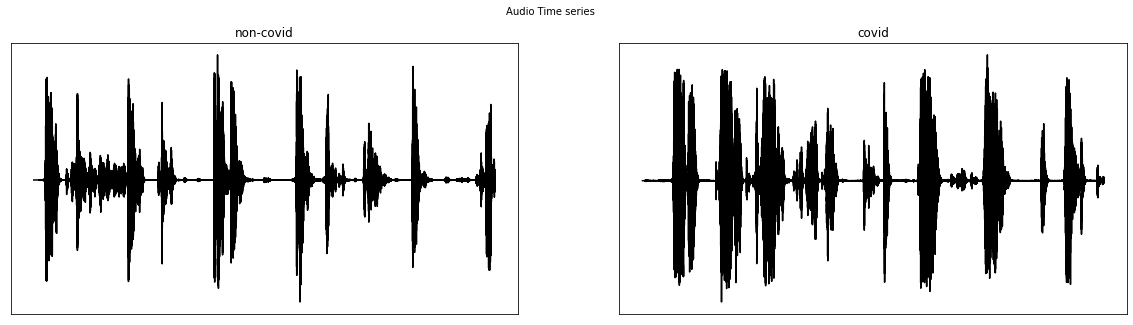

In [12]:
plot_signal(signals)

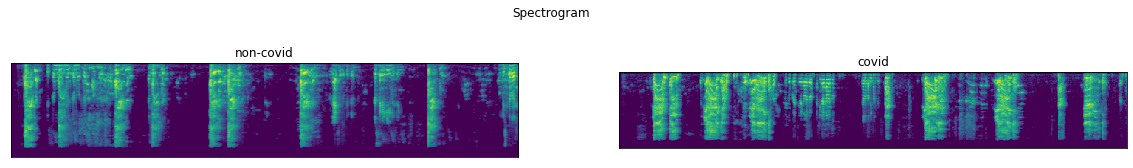

In [13]:
dis_feature(mel_spectograms)

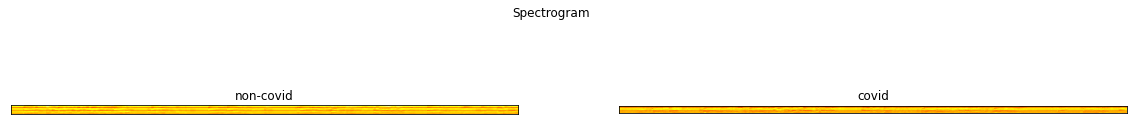

In [14]:
dis_feature(mfccs, cmap='hot')

## Prepare Training Data

In [15]:
X, y = [], []
for file in tqdm(data.iterrows()):
    if file[1][0] == 0:
        signal, rate = librosa.load(ENV_DIR + 'audio/covid/neg/' + ''.join(file[1][1].split('.mp3')) + '.wav')
        for i in range(5):
            n = np.random.randint(0, len(signal)-(rate*2))
            sig_ = signal[n : int(n+(rate*2))]
            mfcc_ = librosa.feature.mfcc(sig_, sr=rate, n_mfcc=13)
            X.append(mfcc_)
            y.append(0)
    elif file[1][0] == 1:
        signal, rate = librosa.load(ENV_DIR + 'audio/covid/pos/' + ''.join(file[1][1].split('.mp3')) + '.wav')
        for i in range(5):
            n = np.random.randint(0, len(signal)-(rate*2))
            sig_ = signal[n : int(n+(rate*2))]
            mfcc_ = librosa.feature.mfcc(sig_, sr=rate, n_mfcc=13)
            X.append(mfcc_)
            y.append(1)



0it [00:00, ?it/s]

## Adding More Data

In [16]:
ENV_DIR2 = 'E:/B21-CAP0443 Dataset/[Audio - Classification] COVID-19 Cough Recordings/'
AUDIO_DIR = ENV_DIR2 + 'trial_covid/'

data2 = pd.read_csv(ENV_DIR2 + 'cough_trial_extended.csv')
data2['class'] = data2['class'].apply(lambda x: 0 if x=='not_covid' else 1)
data2

,file_properties,class
0,0v8MGxNetjg_ 10.000_ 20.000.wav,0
1,1j1duoxdxBg_ 70.000_ 80.000.wav,0
2,1MSYO4wgiag_ 120.000_ 130.000.wav,0
3,1PajbAKd8Kg_ 0.000_ 10.000.wav,0
4,cov1.wav,1
...,...,...
165,-bZrDCS8KAg_ 70.000_ 80.000.wav,0
166,-ej81N6Aqo4_ 0.000_ 8.000.wav,0
167,-gvLnl1smfs_ 90.000_ 100.000.wav,0
168,-hu5q-Nn4BM_ 70.000_ 80.000.wav,0


In [17]:
for data in tqdm(data2.iterrows()):
    try :
        signal, rate = librosa.load(AUDIO_DIR + data[1][0])
        for i in range(5):
            n = np.random.randint(0, len(signal)-(rate*2))
            sig_ = signal[n : int(n+(rate*2))]
            mfcc_ = librosa.feature.mfcc(sig_, sr=rate, n_mfcc=13)
            X.append(mfcc_)
            y.append(data[1][1])
    except:
        pass

0it [00:00, ?it/s]

In [18]:
X = np.array(X)
y = np.array(y)

y = tf.keras.utils.to_categorical(y, num_classes=2)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [19]:
print(X.shape)
print(y.shape)

(920, 13, 87, 1)
(920, 2)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Build the Model

In [25]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

input_tensor = tf.keras.layers.Input(shape=(13, 87, 1))
x = tf.keras.layers.Conv2D(3, (3, 3), padding='same')(input_tensor)
x = base_model(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(2, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = 'acc')
model.summary()

94773248/94765736 [==============================] - 476s 5us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 13, 87, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 87, 3)         30        
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                196640    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 23,784,448
Trainable params: 196,736
Non-tra

In [26]:
TRAINABLE_LAYERS= len(model.layers)-len(base_model.layers) + 5
print(TRAINABLE_LAYERS)
for layer in model.layers[:-TRAINABLE_LAYERS]:
    layer.trainable=False
for layer in model.layers[-TRAINABLE_LAYERS:]:
    layer.trainable=True

-164


## Train

In [27]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss', factor=0.25, patience=5, verbose=1, mode='auto',
    min_delta=1e-10, cooldown=0, min_lr=0
)

early_stopping = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=9, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

ckpt = ModelCheckpoint(
    filepath = './saved_model/checkpoint/',
    save_weights_only = True,
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True
)

callbacks = [reduce_learning_rate, early_stopping]

In [28]:
history = model.fit(X_train,y_train ,
            validation_data=(X_test, y_test),
            epochs=100, callbacks=callbacks)

Epoch 1/100
23/23 [==============================] - 10s 130ms/step - loss: 1.2784 - acc: 0.7855 - val_loss: 0.2145 - val_acc: 0.9185
Epoch 2/100
23/23 [==============================] - 1s 46ms/step - loss: 0.3170 - acc: 0.8478 - val_loss: 0.1694 - val_acc: 0.9348
Epoch 3/100
23/23 [==============================] - 1s 49ms/step - loss: 0.2306 - acc: 0.8842 - val_loss: 0.1858 - val_acc: 0.9130
Epoch 4/100
23/23 [==============================] - 1s 50ms/step - loss: 0.1973 - acc: 0.8968 - val_loss: 0.1661 - val_acc: 0.9185
Epoch 5/100
23/23 [==============================] - 1s 47ms/step - loss: 0.1777 - acc: 0.8988 - val_loss: 0.1500 - val_acc: 0.9348
Epoch 6/100
23/23 [==============================] - 1s 48ms/step - loss: 0.1503 - acc: 0.9260 - val_loss: 0.1512 - val_acc: 0.9239
Epoch 7/100
23/23 [==============================] - 1s 48ms/step - loss: 0.1335 - acc: 0.9475 - val_loss: 0.1463 - val_acc: 0.9185
Epoch 8/100
23/23 [==============================] - 1s 47ms/step - loss: 

## Visualize Model Performance

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

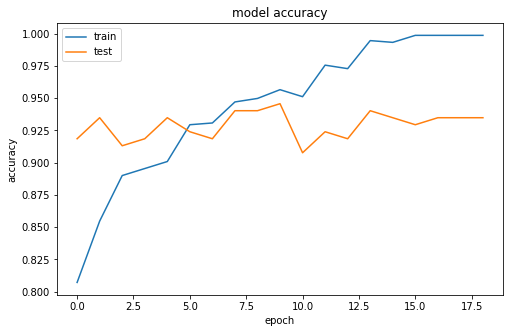

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

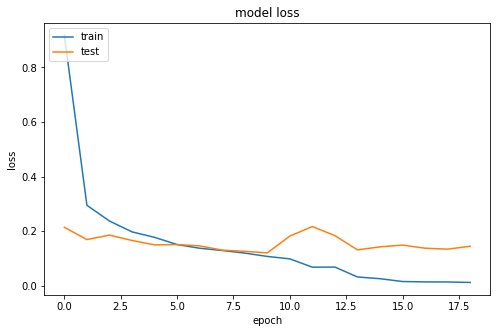

In [30]:
plt.figure(figsize=(8, 5))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(8, 5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Convert To TFLite

In [31]:
export_dir = 'saved_model/2'
tf.saved_model.save(model, export_dir=export_dir)

INFO:tensorflow:Assets written to: saved_model/2\assets


In [32]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

optimize="Speed"
if optimize=='Speed':
    converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
elif optimize=='Storage':
     converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
else:    
    converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()
open("resnet50-covcough.tflite", "wb").write(tflite_model)

24316480